<div style="text-align:center; padding:30px; background:#fef7f1; border-radius:15px; box-shadow:0px 4px 8px rgba(0,0,0,0.1);">

  <h1 style="color:darkorange; font-family:Trebuchet MS; font-size:48px; margin-bottom:15px;">
    Hotel Booking Analysis
  </h1>

  <p style="color:#004080; font-size:20px; font-family:Calibri; line-height:1.6; max-width:900px; margin:auto;">
    This dataset contains booking information for a <b>city hotel</b> and a <b>resort hotel</b>.  
    It includes details such as <i>when the booking was made, length of stay, the number of guests 
    (adults, children, and babies), parking availability</i>, and more.  
    All personally identifying information has been removed.  
    <br><br>
    <span style="color:darkred; font-weight:bold;">Objective:</span> Explore and analyze the data 
    to discover key factors that influence hotel bookings.
  </p>

  <img src="hotel booking.avif" style="width:100%; max-height:500px; border-radius:20px; margin-top:25px; object-fit:cover;">

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:darkgreen; background-color:#eafbea; padding:10px; border-radius:8px; text-align:center;">
1. Data Loading and Initial Overview
</h2>

<p style="font-size:15px; color:#333;">
In this step, we import the dataset using <b>Pandas</b> and perform an initial exploration to understand its structure.
</p>

<ul style="font-size:14px; color:#444;">
  <li>Number of rows and columns</li>
  <li>Data types of each column</li>
  <li>Initial observations using <code>head()</code>, <code>info()</code>, and <code>describe()</code></li>
</ul>



In [2]:
Hotel_booking_df = pd.read_csv("D:/work/python/hotel_bookings.csv")

In [3]:
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
#last 10 rows
Hotel_booking_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
Hotel_booking_df.shape   # shape of the data

(119390, 32)

In [7]:
Hotel_booking_df.columns  # list of columns present in the data

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
Hotel_booking_df.info()    # overview of data with column values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
Hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h2 style="color:darkblue; background-color:#eef4ff; padding:10px; border-radius:8px; text-align:center; font-family:Trebuchet MS;">
2. Data Pre-processing
</h2>

<p style="font-size:15px; color:#333; font-family:Calibri;">
In this step, we clean and prepare the dataset for analysis by applying different pre-processing techniques.
</p>

<ul style="font-size:14px; color:#444; font-family:Calibri; line-height:1.6;">
  <li>Handling missing values</li>
  <li>Removing duplicates</li>
  <li>Correcting data types</li>
  <li>Creating derived columns</li>
  <li>Filtering or aggregating data</li>
</ul>


<h3 style="color:darkred; font-family:Verdana; text-decoration:underline;">
Handling Missing Values
</h3>

In [10]:
Hotel_booking_df.isna().sum().sort_values(ascending=False) # gives the count of null values


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [11]:
#fill with mean or median
#drop the column which have the unknown values
#Replacing null values
#mean is less than .5 so 0 used to replace null
# children (fill missing with 0 first, then convert to int)
Hotel_booking_df['children'] = Hotel_booking_df['children'].fillna(0).astype(int)

# The company column was dropped because its codes cannot be replaced with the mean.
Hotel_booking_df.drop(columns=['company'],inplace=True)


# The agent column was dropped because its codes cannot be replaced with the mean.
Hotel_booking_df.drop(columns=['agent'],inplace=True)

# country
Hotel_booking_df['country'] = Hotel_booking_df['country'].fillna('Other')


In [12]:
Hotel_booking_df.isna().sum().sort_values(ascending=False) # gives the count of null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<h3 style="color:teal; font-family:Verdana; text-decoration:underline;">
Removing Duplicates
</h3>

In [13]:
Hotel_booking_df[Hotel_booking_df.duplicated()].shape 

(32020, 30)

In [14]:
Hotel_booking_df.drop_duplicates(inplace = True) 

In [15]:
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  int64  
 11  babies                          87370 non-null  int64  
 12  meal                            8737

In [16]:
Hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.274934,79.900595,2016.210312,26.838549,15.815967,1.005414,2.625604,1.875873,0.138675,0.010805,0.039087,0.030422,0.184045,0.271661,0.749788,106.343157,0.084251,0.698649
std,0.446484,86.055086,0.686075,13.674188,8.835216,1.031980,2.053693,0.626521,0.455933,0.113515,0.193802,0.369200,1.732148,0.727331,10.017213,55.016143,0.281571,0.831985
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
Hotel_booking_df[Hotel_booking_df.adults + Hotel_booking_df.babies + Hotel_booking_df.children == 0].shape

(166, 30)

In [18]:
#Removing rows where total is 0.

In [19]:
Hotel_booking_df.drop(
    Hotel_booking_df[Hotel_booking_df.adults + Hotel_booking_df.babies + Hotel_booking_df.children == 0].index,
    inplace=True
)


In [20]:
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Correcting Datatypes
</h3>


In [21]:
# Convert date column to datetime
Hotel_booking_df['reservation_status_date'] = pd.to_datetime(
    Hotel_booking_df['reservation_status_date'], errors='coerce'
)

# Convert object columns to category
category_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

Hotel_booking_df[category_cols] = Hotel_booking_df[category_cols].astype('category')

Hotel_booking_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87204 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87204 non-null  category      
 1   is_canceled                     87204 non-null  int64         
 2   lead_time                       87204 non-null  int64         
 3   arrival_date_year               87204 non-null  int64         
 4   arrival_date_month              87204 non-null  category      
 5   arrival_date_week_number        87204 non-null  int64         
 6   arrival_date_day_of_month       87204 non-null  int64         
 7   stays_in_weekend_nights         87204 non-null  int64         
 8   stays_in_week_nights            87204 non-null  int64         
 9   adults                          87204 non-null  int64         
 10  children                        87204 non-null  int64         
 11  babies

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Creating Derived Columns
</h3>


In [22]:
# Creating new columns
#Not removing the old columns because they are used in the visualizatio
Hotel_booking_df['kids'] = Hotel_booking_df['children'] + Hotel_booking_df['babies']
Hotel_booking_df['Full_stay'] = Hotel_booking_df['stays_in_weekend_nights'] + Hotel_booking_df['stays_in_week_nights']


In [23]:
Hotel_booking_df['Total_members'] = Hotel_booking_df.adults + Hotel_booking_df.children + Hotel_booking_df.babies

In [24]:
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87204 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87204 non-null  category      
 1   is_canceled                     87204 non-null  int64         
 2   lead_time                       87204 non-null  int64         
 3   arrival_date_year               87204 non-null  int64         
 4   arrival_date_month              87204 non-null  category      
 5   arrival_date_week_number        87204 non-null  int64         
 6   arrival_date_day_of_month       87204 non-null  int64         
 7   stays_in_weekend_nights         87204 non-null  int64         
 8   stays_in_week_nights            87204 non-null  int64         
 9   adults                          87204 non-null  int64         
 10  children                        87204 non-null  int64         
 11  babies

<h3 style="color:purple; font-family:Verdana; text-decoration:underline;">
Filtering or Aggregating Data
</h3>

In [25]:
# Bookings with children
Hotel_booking_df[Hotel_booking_df['children'] > 0]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay,Total_members
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,0,Transient,154.77,0,1,Check-Out,2015-07-05,1,4,3
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,0,Transient,153.00,0,0,Canceled,2015-06-02,2,7,4
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,0,Transient,107.00,1,2,Check-Out,2015-07-03,2,1,4
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,Transient,153.00,1,0,Check-Out,2015-07-05,2,2,4
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,...,0,Transient,108.73,0,2,Canceled,2015-04-15,1,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,0,Transient,135.00,0,2,Check-Out,2017-09-01,1,3,3
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,0,Transient,177.75,0,0,Check-Out,2017-09-02,1,6,3
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,0,Transient,189.00,0,3,Check-Out,2017-09-02,2,3,4
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,0,Transient,153.90,0,0,Check-Out,2017-09-03,1,5,3


In [26]:
# Bookings from Portugal (country = 'PRT')
Hotel_booking_df[Hotel_booking_df['country'] == 'PRT']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay,Total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,2,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,2,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,Transient,82.00,0,1,Canceled,2015-05-06,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119317,City Hotel,0,188,2017,August,35,30,0,4,3,...,0,Transient,129.60,0,0,Check-Out,2017-09-03,0,4,3
119340,City Hotel,0,110,2017,August,35,29,0,5,2,...,0,Transient,171.00,0,2,Check-Out,2017-09-03,0,5,2
119357,City Hotel,0,47,2017,August,35,31,1,3,1,...,0,Transient,91.02,0,0,Check-Out,2017-09-04,0,4,1
119366,City Hotel,0,210,2017,August,35,28,2,5,2,...,0,Transient,85.59,0,1,Check-Out,2017-09-04,0,7,2


In [27]:
# Bookings with ADR (Average Daily Rate) greater than 200
Hotel_booking_df[Hotel_booking_df['adr'] > 200]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay,Total_members
140,Resort Hotel,0,44,2015,July,28,5,2,0,3,...,0,Transient,225.00,2,0,Check-Out,2015-07-07,0,2,3
164,Resort Hotel,0,81,2015,July,28,6,1,3,2,...,0,Transient,210.00,1,0,Check-Out,2015-07-10,2,4,4
303,Resort Hotel,0,79,2015,July,28,11,2,6,2,...,0,Transient,213.75,0,0,Check-Out,2015-07-19,2,8,4
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,0,Transient,230.67,1,2,Check-Out,2015-07-20,2,6,4
412,Resort Hotel,0,37,2015,July,29,15,2,6,2,...,0,Transient,216.13,1,0,Check-Out,2015-07-23,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119339,City Hotel,0,110,2017,August,35,29,0,5,3,...,0,Transient,229.00,0,1,Check-Out,2017-09-03,0,5,3
119365,City Hotel,0,54,2017,August,35,27,3,5,1,...,0,Transient,266.75,0,1,Check-Out,2017-09-04,0,8,1
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,0,Transient,209.25,0,3,Check-Out,2017-09-04,0,6,3
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,0,Transient,209.00,0,0,Check-Out,2017-09-05,0,6,3


In [28]:
# Selecting only a few columns
Hotel_booking_df[['hotel', 'lead_time', 'adr']].head()

,hotel,lead_time,adr
0,Resort Hotel,342,0.0
1,Resort Hotel,737,0.0
2,Resort Hotel,7,75.0
3,Resort Hotel,13,75.0
4,Resort Hotel,14,98.0


In [29]:
# Average daily rate per hotel type
Hotel_booking_df.groupby('hotel', observed=True)['adr'].mean()

hotel
City Hotel      111.274295
Resort Hotel     99.070541
Name: adr, dtype: float64

In [30]:
# Total number of bookings per country
Hotel_booking_df.groupby('country', observed=True)['hotel'].count().sort_values(ascending=False)

country
PRT    27342
GBR    10422
FRA     8823
ESP     7242
DEU     5383
       ...  
MRT        1
SMR        1
SLE        1
UMI        1
VGB        1
Name: hotel, Length: 178, dtype: int64

In [31]:
# Average stay duration per customer type
Hotel_booking_df.groupby('customer_type', observed=True)['Full_stay'].mean()

customer_type
Contract           6.040829
Group              2.894640
Transient          3.577635
Transient-Party    3.330937
Name: Full_stay, dtype: float64

In [32]:
# Multiple aggregations: ADR stats & average stay duration per hotel type
Hotel_booking_df.groupby('hotel', observed=True).agg({
    'adr': ['mean', 'max', 'min'],
    'Full_stay': 'mean'
})

adr               Full_stay
                    mean     max   min      mean
hotel                                           
City Hotel    111.274295  5400.0  0.00  3.142002
Resort Hotel   99.070541   508.0 -6.38  4.392853

<h2 style="color:darkorange; font-family:Arial; text-align:center; text-decoration:underline;">
STEP 3: Exploratory Data Analysis (EDA)
</h2>

<ul style="font-size:16px; font-family:Verdana; color:darkslategray;">
  <li>Conduct descriptive and exploratory analysis to uncover <b>patterns and trends</b>.</li>
  <li>Perform <b>Univariate, Bivariate, and Multivariate</b> analysis.</li>
  <li>Use <b>groupby, pivot tables, and correlation analysis</b> for deeper insights.</li>
  <li>Include <b>statistical summaries</b> to support findings.</li>
</ul>


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Correlation
</h3>

In [33]:
Corr_df = Hotel_booking_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

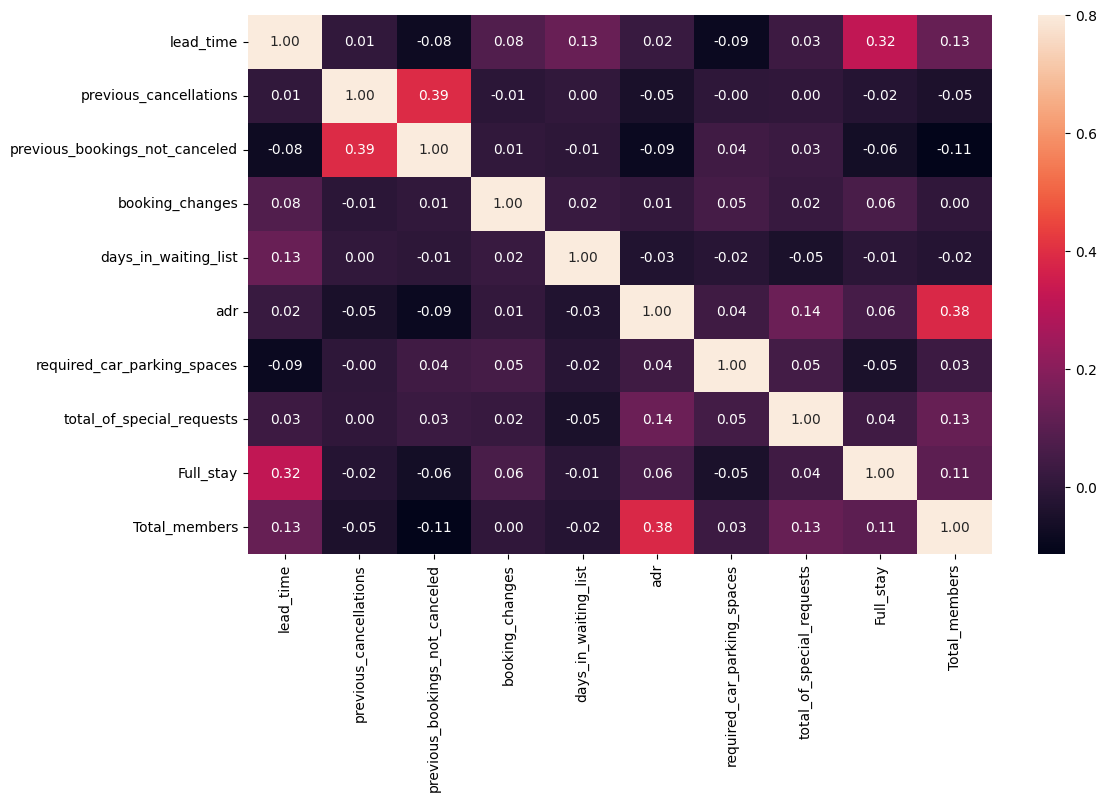

In [34]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
1-->Full_stay length and lead_time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival date.

2--> adr (Average daily rate) is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.
</h6>

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Univariate
</h3>

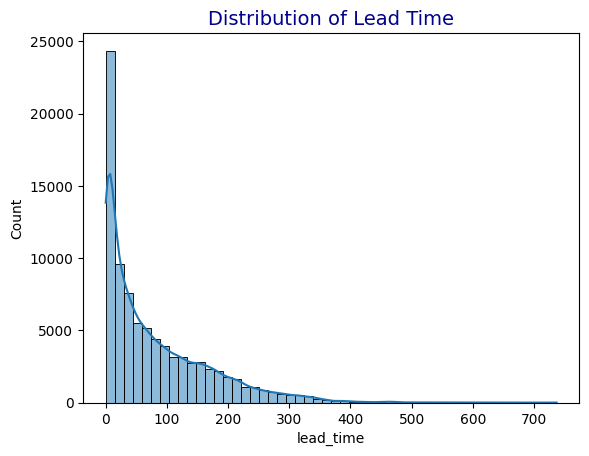

In [35]:
# Distribution of lead_time
sns.histplot(Hotel_booking_df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time", fontsize=14,color="darkblue")
plt.show()

<h6 style="color:darkblue"; >
Most bookings have a short lead time (close to 0–50 days).

Very few bookings are made far in advance (over 200–700 days).

The distribution is right-skewed, meaning there are more short-term bookings than long-term bookings.

Insight: Hotels can expect most guests to book within a few weeks or months, and very few plan bookings more than a year in advance.
</h6>

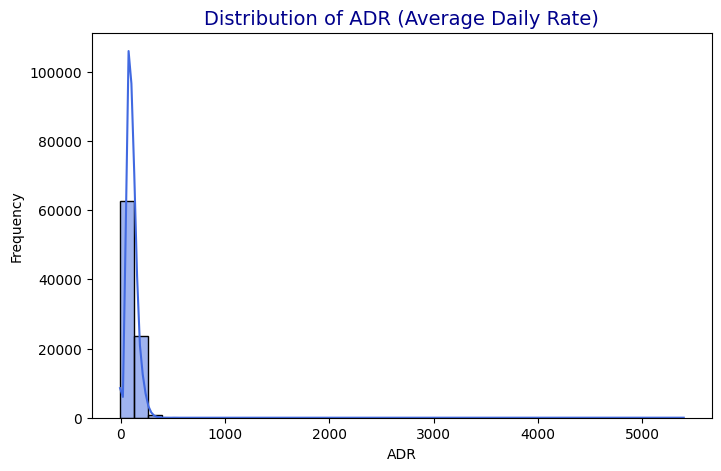

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(Hotel_booking_df['adr'], bins=40, kde=True, color="royalblue")
plt.title("Distribution of ADR (Average Daily Rate)", fontsize=14, color="darkblue")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Most bookings have an ADR in the lower range (less than ~200–300).

A few bookings have extremely high ADRs, creating a long tail on the right.

The distribution is heavily right-skewed, meaning most guests pay standard rates, but a small number pay very high prices.

Insight: There are occasional high-value bookings, but the majority of customers pay typical rates.
</h6>

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Bivariate
</h3>

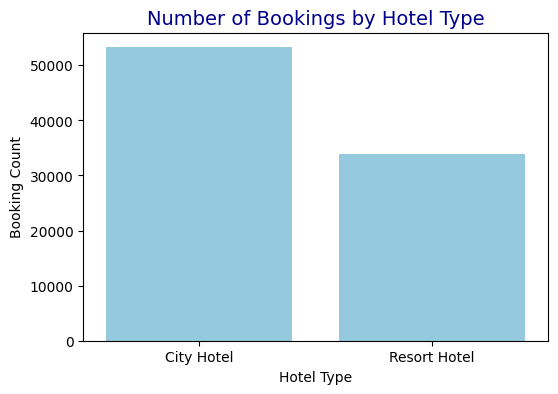

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', data=Hotel_booking_df, color="skyblue")
plt.title("Number of Bookings by Hotel Type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type")
plt.ylabel("Booking Count")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
The City Hotel receives a significantly higher number of bookings (over 50,000) than the Resort Hotel (around 34,000).
</h6>

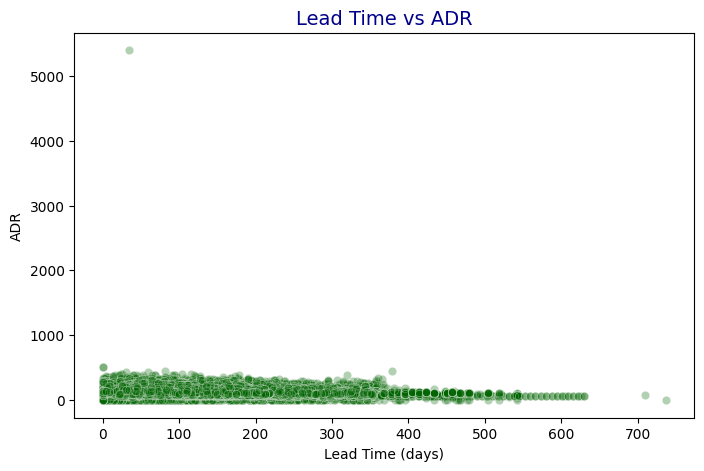

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='lead_time', y='adr', data=Hotel_booking_df, alpha=0.3, color="darkgreen")
plt.title("Lead Time vs ADR", fontsize=14, color="darkblue")
plt.xlabel("Lead Time (days)")
plt.ylabel("ADR")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
No Strong Correlation: There is no clear positive or negative correlation between the number of days a booking is made in advance (Lead Time) and the price (ADR).

Low ADR Concentration: The vast majority of bookings have a low ADR (mostly below $500), regardless of the Lead Time, indicating that most reservations fall into a similar, lower price band.

High-Value Outliers: The extremely high ADR values (up to over $5,000) are associated with short Lead Times (less than approximately 100 days), suggesting that very high-priced bookings are typically made closer to the stay date.

High Lead Time: Bookings made with very long Lead Times (up to over 700 days) have an extremely low ADR.
</h6>

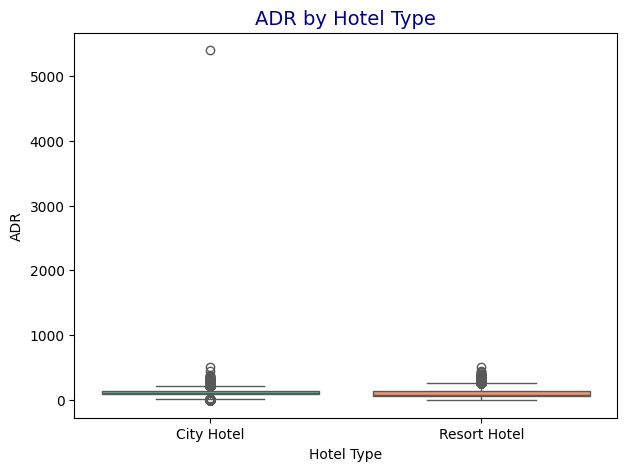

In [39]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hotel', y='adr', hue='hotel', data=Hotel_booking_df, palette="Set2", legend=False)
plt.title("ADR by Hotel Type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Median ADR: The Resort Hotel has a slightly higher median ADR (the horizontal line inside the box) compared to the City Hotel.
Outliers: Both hotel types have outliers (individual points above the whiskers), but the City Hotel exhibits a slightly higher maximum ADR outlier, reaching over $5,000, which is the highest value in the dataset.
</h6>

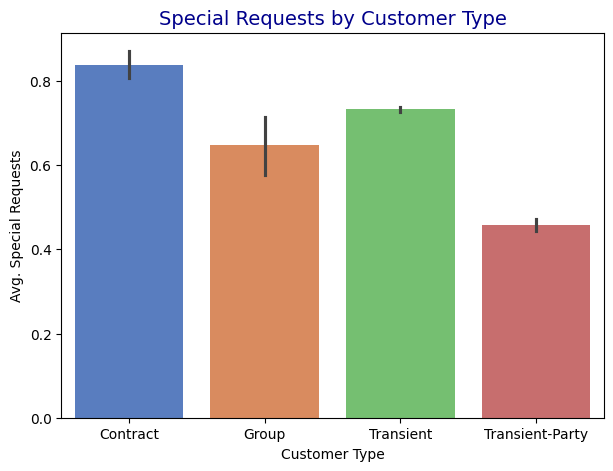

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(
    x='customer_type', 
    y='total_of_special_requests', 
    hue='customer_type',
    data=Hotel_booking_df, 
    palette="muted",
    legend=False          
)
plt.title("Special Requests by Customer Type", fontsize=14,color="darkblue")
plt.xlabel("Customer Type")
plt.ylabel("Avg. Special Requests")
plt.show()



<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Contract customers have the highest average number of special requests (around 0.85). 
Transient customers are the next highest (around 0.73). Group customers make fewer requests (around 0.65), and Transient-Party customers make the fewest special requests on average (under 0.50). 
This suggests that customers with pre-negotiated or individual arrangements are more likely to submit special requests than those booking as part of a temporary group or party.
</h6>


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Multivariate
</h3>

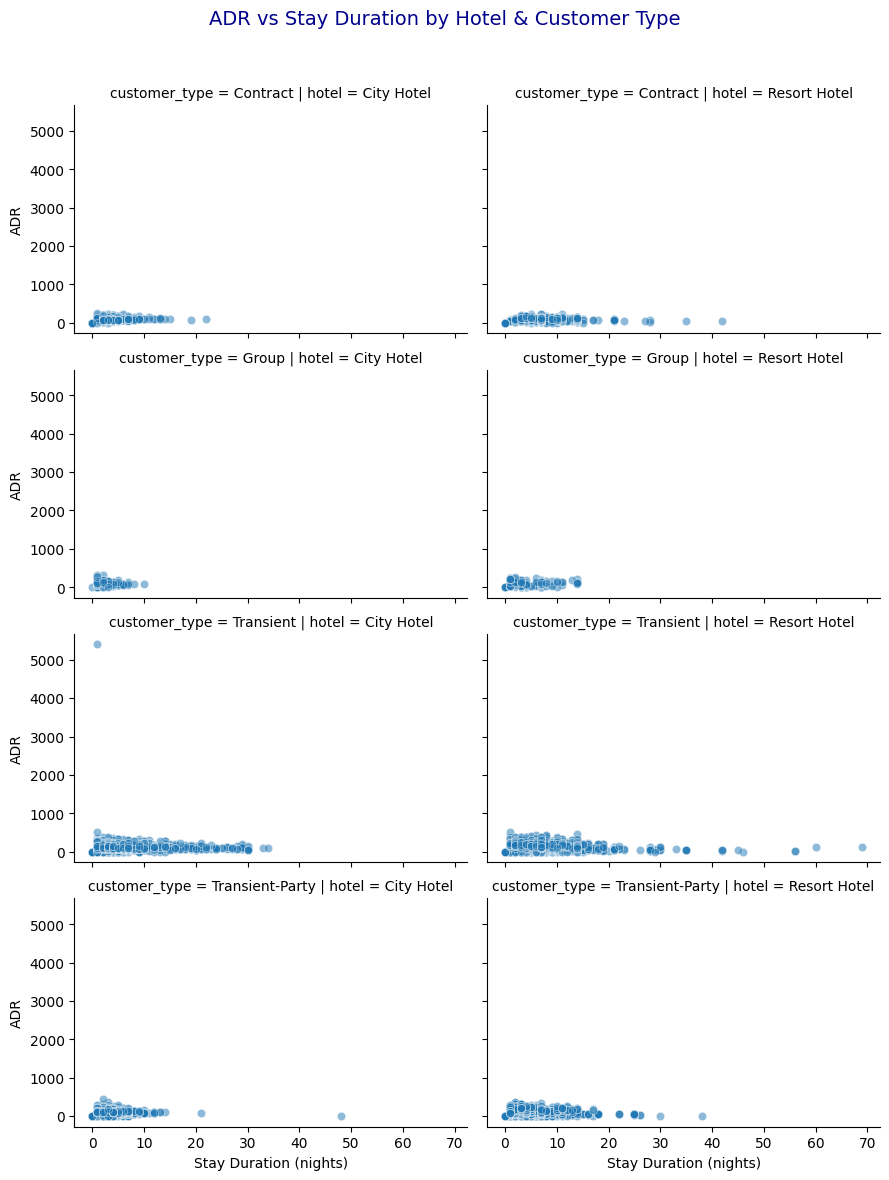

In [41]:
g = sns.FacetGrid(Hotel_booking_df, col="hotel", row="customer_type", height=3, aspect=1.5)
g.map(sns.scatterplot, "Full_stay", "adr", alpha=0.5)
g.set_axis_labels("Stay Duration (nights)", "ADR")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("ADR vs Stay Duration by Hotel & Customer Type",fontsize=14, color="darkblue")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Faceted scatter plot comparing ADR versus Stay Duration (nights), segmented by Customer Type (Contract, Group, Transient, Transient-Party) and Hotel Type (City Hotel, Resort Hotel).

For all segments, the ADR is very low for the majority of bookings (below $500).

Most bookings across all types are for short stays, primarily under 10 nights.

There is a significant outlier with a very high ADR (over $5,000) for a short stay (around 1-2 nights) in the Transient customer type and City Hotel segment.

Contract customers have the lowest concentration of high ADRs.

There is no clear visual correlation between the Stay Duration and the ADR in any of the segments.

Resort Hotels generally show a slightly wider range of stay durations compared to City Hotels, particularly for Transient and Transient-Party customers, although the highest frequency remains at short stays.
</h6>

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
groupby, pivot tables, and correlation analysis
</h3>

In [42]:
Hotel_booking_df.groupby(['hotel', 'customer_type'], observed=True)['adr'].mean().reset_index()

,hotel,customer_type,adr
0,City Hotel,Contract,107.854431
1,City Hotel,Group,93.995874
2,City Hotel,Transient,114.296209
3,City Hotel,Transient-Party,93.466617
4,Resort Hotel,Contract,79.693843
5,Resort Hotel,Group,75.741213
6,Resort Hotel,Transient,103.824229
7,Resort Hotel,Transient-Party,79.547142


In [43]:
pd.pivot_table(
    Hotel_booking_df,
    values='adr',
    index='hotel',
    columns='customer_type',
    aggfunc='mean',
    observed=True
)



customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,107.854431,93.995874,114.296209,93.466617
Resort Hotel,79.693843,75.741213,103.824229,79.547142


In [44]:
Hotel_booking_df.groupby(['hotel', 'customer_type'], observed=True)['Full_stay'].mean().reset_index()


,hotel,customer_type,Full_stay
0,City Hotel,Contract,3.158828
1,City Hotel,Group,2.524164
2,City Hotel,Transient,3.194954
3,City Hotel,Transient-Party,2.825988
4,Resort Hotel,Contract,8.575540
5,Resort Hotel,Group,3.261029
6,Resort Hotel,Transient,4.200915
7,Resort Hotel,Transient-Party,4.088361


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
 Statistical Summaries (EDA)
</h3>

In [45]:
# ===========================
# Statistical Summaries (EDA)
# ===========================

print("\n🔹 Summary of Numerical Columns:")
display(Hotel_booking_df.describe().T)

# Check if there are any categorical columns left
cat_cols = Hotel_booking_df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print("\n🔹 Summary of Categorical Columns:")
    display(Hotel_booking_df[cat_cols].describe().T)
else:
    print("\nNo categorical (object) columns available after preprocessing.")

print("\n🔹 Top 10 Countries by Bookings:")
display(Hotel_booking_df['country'].value_counts().head(10))

print("\n🔹 Skewness & Kurtosis (Numerical Features):")
display(
    Hotel_booking_df[['lead_time','adr','Full_stay']]
    .agg(['mean','median','std','skew','kurt'])
)

print("\n🔹 Correlation with ADR:")
display(
    Hotel_booking_df.corr(numeric_only=True)['adr']
    .sort_values(ascending=False)
)



🔹 Summary of Numerical Columns:


,count,mean,min,25%,50%,75%,max,std
is_canceled,87204.0,0.275274,0.0,0.0,0.0,1.0,1.0,0.446655
lead_time,87204.0,79.980288,0.0,11.0,49.0,125.0,737.0,86.061442
arrival_date_year,87204.0,2016.210369,2015.0,2016.0,2016.0,2017.0,2017.0,0.686037
arrival_date_week_number,87204.0,26.835306,1.0,16.0,27.0,37.0,53.0,13.66883
arrival_date_day_of_month,87204.0,15.816258,1.0,8.0,16.0,23.0,31.0,8.835616
stays_in_weekend_nights,87204.0,1.004759,0.0,0.0,1.0,2.0,19.0,1.027466
stays_in_week_nights,87204.0,2.624134,0.0,1.0,2.0,4.0,50.0,2.039936
adults,87204.0,1.879444,0.0,2.0,2.0,2.0,55.0,0.621743
children,87204.0,0.138939,0.0,0.0,0.0,0.0,10.0,0.456327
babies,87204.0,0.010825,0.0,0.0,0.0,0.0,10.0,0.113622



No categorical (object) columns available after preprocessing.

🔹 Top 10 Countries by Bookings:


country
PRT    27342
GBR    10422
FRA     8823
ESP     7242
DEU     5383
ITA     3060
IRL     3015
BEL     2081
BRA     1991
NLD     1910
Name: count, dtype: int64


🔹 Skewness & Kurtosis (Numerical Features):


,lead_time,adr,Full_stay
mean,79.980288,106.524006,3.628893
median,49.000000,98.205000,3.000000
std,86.061442,54.893370,2.743122
skew,1.430634,11.019704,2.947309
kurt,2.122951,992.314446,23.704771



🔹 Correlation with ADR:


adr                               1.000000
Total_members                     0.382203
children                          0.326367
kids                              0.321015
adults                            0.241946
arrival_date_year                 0.176627
total_of_special_requests         0.137400
is_canceled                       0.127229
arrival_date_week_number          0.099108
Full_stay                         0.056011
stays_in_week_nights              0.055009
stays_in_weekend_nights           0.040324
required_car_parking_spaces       0.038705
babies                            0.023292
arrival_date_day_of_month         0.022600
lead_time                         0.021889
booking_changes                   0.010107
days_in_waiting_list             -0.032534
previous_cancellations           -0.050374
previous_bookings_not_canceled   -0.086073
is_repeated_guest                -0.149471
Name: adr, dtype: float64

<h2 style="color:darkorange; font-family:Arial; text-align:center; text-decoration:underline;">
STEP 3: Visualizations
</h2>

<ul style="font-size:16px; font-family:Verdana; color:darkslategray;">
  <li>Use Matplotlib / Seaborn / Plotly to generate meaningful visualizations:</li>
  <li>Bar plots, line charts, pie charts, histograms, box plots, scatter plots, heatmaps, etc </li>
  <li>Ensure visuals should have proper titles, labels, legends, and color schemes</li>
  <li> Use subplots where applicable for better layout </li>
</ul>

<h3 style="color:darkblue"; >
Hotel Booking by type
</h3>

Text(0, 0.5, 'Count')

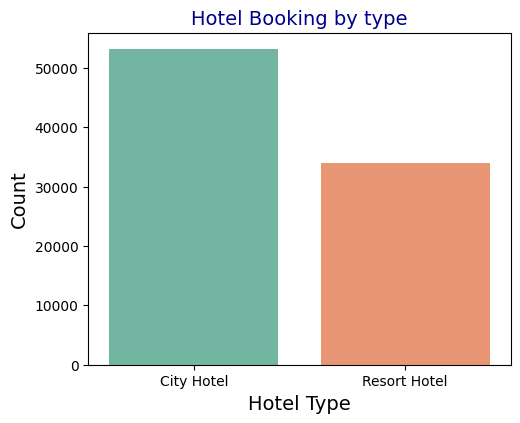

In [46]:
plt.figure(figsize=(12, 25))
plt.subplot(5, 2, 1)
sns.countplot(x='hotel', hue='hotel', data=Hotel_booking_df, palette="Set2",legend=False)
plt.title("Hotel Booking by type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
City hotels received significantly more bookings than resort hotels, showing they are the preferred choice for guests.
</h6>

<h3 style="color:darkblue"; >
Rate Trend Over Months
</h3>

Text(0, 0.5, 'ADR')

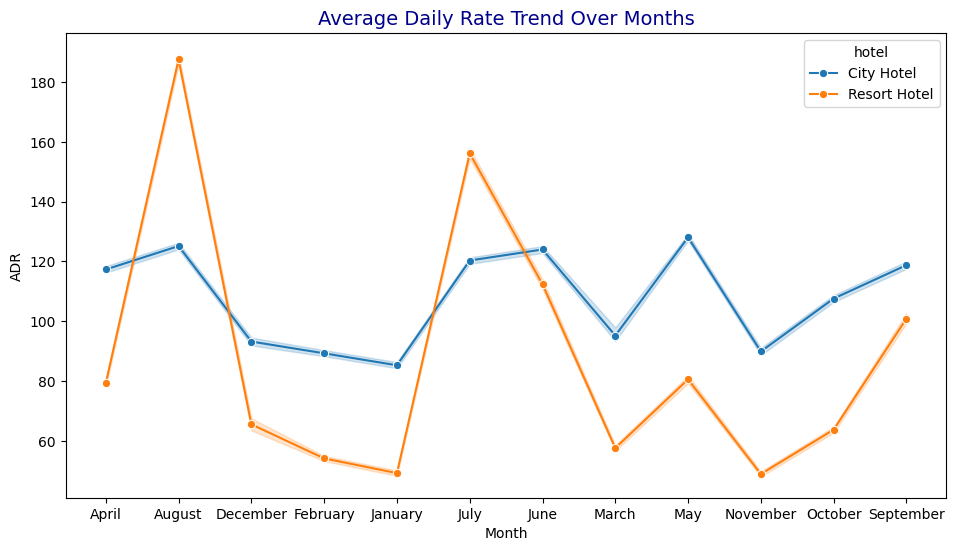

In [47]:
plt.figure(figsize=(25,35))
plt.subplot(5, 2, 2)
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=Hotel_booking_df, marker="o")
plt.title("Average Daily Rate Trend Over Months",fontsize=14, color="darkblue")
plt.xlabel("Month")
plt.ylabel("ADR")


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Resort hotels have the highest rates in July and August, while city hotel rates stay steady across the months.
</h6>

customer_type
Transient          71843
Transient-Party    11685
Contract            3135
Group                541
Name: count, dtype: int64


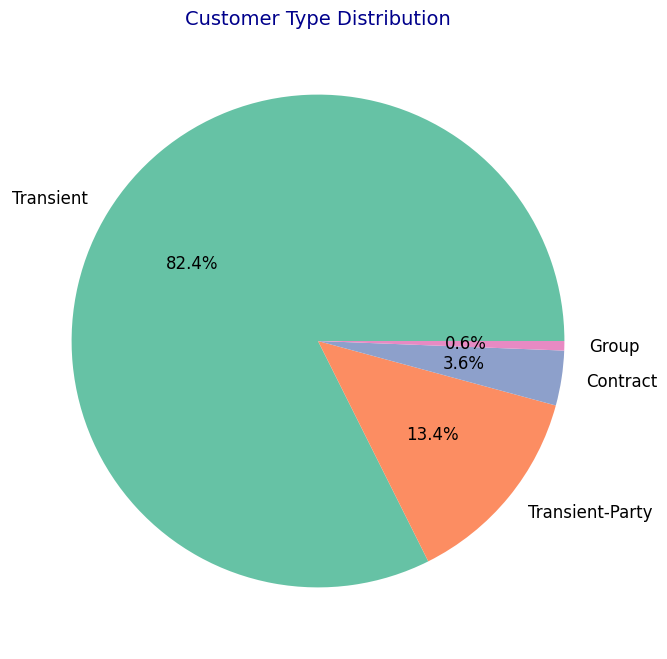

In [48]:
customer_type_counts = Hotel_booking_df['customer_type'].value_counts()
print(customer_type_counts)
plt.figure(figsize=(8,8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2"), textprops={'fontsize': 12})
plt.title("Customer Type Distribution",fontsize=14, color="darkblue")
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
The majority of customers are Transient (82.4%), followed by Transient-Party (13.4%), while Contract (3.6%) and Group (0.6%) bookings are very rare.
</h6>

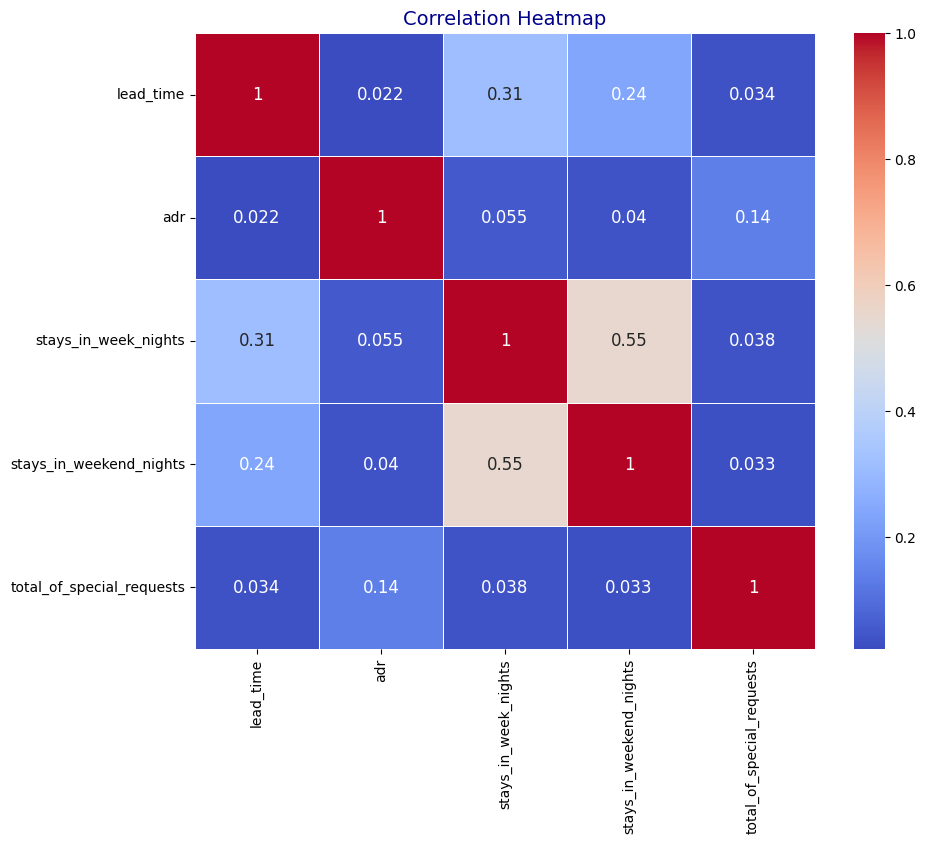

In [49]:
plt.figure(figsize=(10,8))
corr = Hotel_booking_df[['lead_time','adr','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size":12})
plt.title("Correlation Heatmap",fontsize=14, color="darkblue")
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
This correlation heatmap shows relationships between different hotel booking variables:

Strongest correlation: stays_in_week_nights and stays_in_weekend_nights (0.55) → People who stay longer on weekdays also tend to stay longer on weekends.

Moderate correlation: lead_time with stays_in_week_nights (0.31) → Longer lead times are slightly associated with longer weekday stays.

Weak correlations: Most other relationships are very weak (<0.15), meaning variables like adr (average daily rate) and special requests don’t strongly relate to stay durations or lead time.
</h6>

<h3 style="color:darkblue"; >
Total Bookings per Year
</h3>

   arrival_date_year  hotel
0               2015  13278
1               2016  42303
2               2017  31623


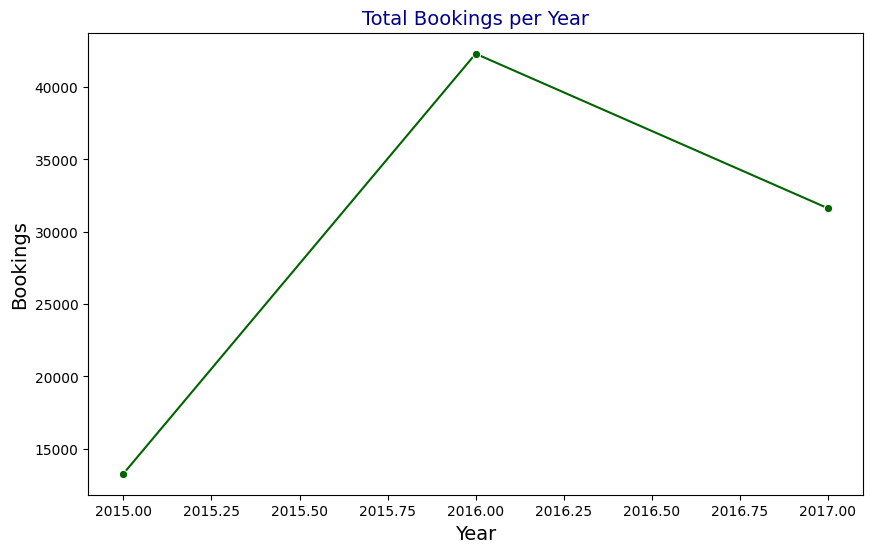

In [50]:
plt.figure(figsize=(10,6))
yearly_bookings = Hotel_booking_df.groupby('arrival_date_year')['hotel'].count().reset_index()
print(yearly_bookings)
sns.lineplot(x='arrival_date_year', y='hotel', data=yearly_bookings, marker="o", color="darkgreen")
plt.title("Total Bookings per Year",fontsize=14, color="darkblue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Bookings", fontsize=14)
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
The chart shows that bookings sharply increased from 2015 to 2016, then slightly dropped in 2017.
</h6>

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 87204, dtype: category
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']
0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 87204, dtype: int32


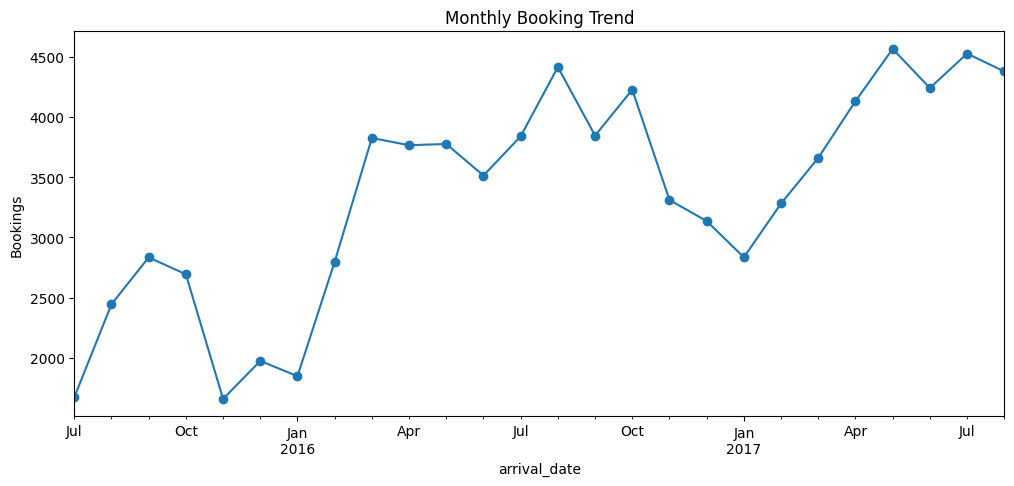

In [51]:
# Make sure month is converted to number
print((Hotel_booking_df['arrival_date_month']))
Hotel_booking_df['arrival_date_month'] = pd.to_datetime(
    Hotel_booking_df['arrival_date_month'], format='%B'
).dt.month
print(Hotel_booking_df['arrival_date_month'])

# Create arrival_date column
Hotel_booking_df['arrival_date'] = pd.to_datetime(
    dict(year=Hotel_booking_df['arrival_date_year'],
         month=Hotel_booking_df['arrival_date_month'],
         day=Hotel_booking_df['arrival_date_day_of_month'])
)

# Monthly booking trend
#converts each date into a month period and number of bookings in each month group
monthly = Hotel_booking_df.groupby(Hotel_booking_df['arrival_date'].dt.to_period('M')).size()

monthly.plot(figsize=(12,5), marker='o', title="Monthly Booking Trend")
plt.ylabel("Bookings")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
The monthly booking trend shows clear fluctuations, with certain months receiving significantly higher bookings compared to others.
</h6>

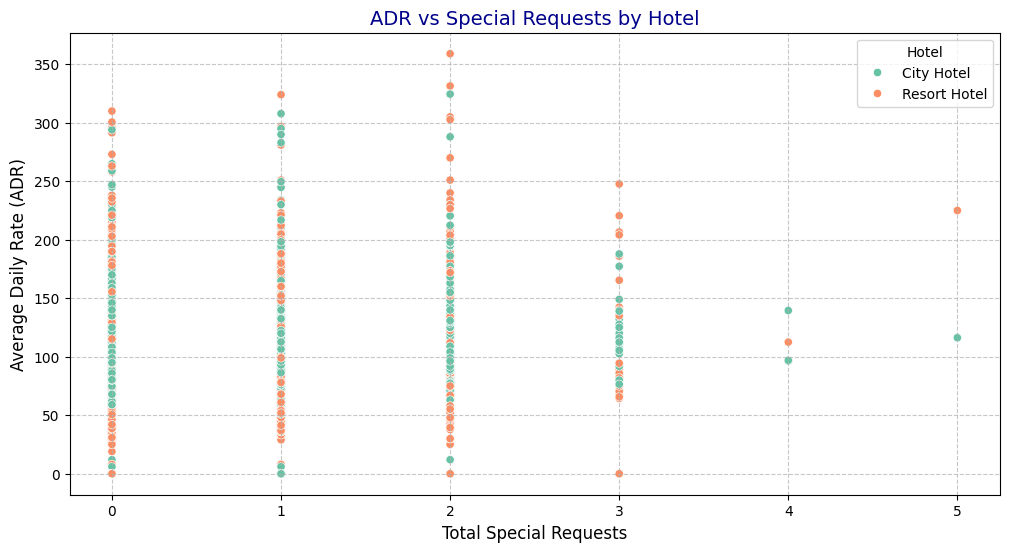

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=Hotel_booking_df.sample(2000, random_state=42), 
    x='total_of_special_requests', 
    y='adr', 
    hue='hotel',
    palette="Set2"
)
plt.title("ADR vs Special Requests by Hotel", fontsize=14, color="darkblue")
plt.xlabel("Total Special Requests", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.legend(title="Hotel")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Resort Hotels generally command higher maximum ADRs than City Hotels for any given number of special requests.
Guests with more special requests tend to have a higher Average Daily Rate (ADR), especially in Resort Hotels, while City Hotels show a steadier ADR across request levels.
</h6>

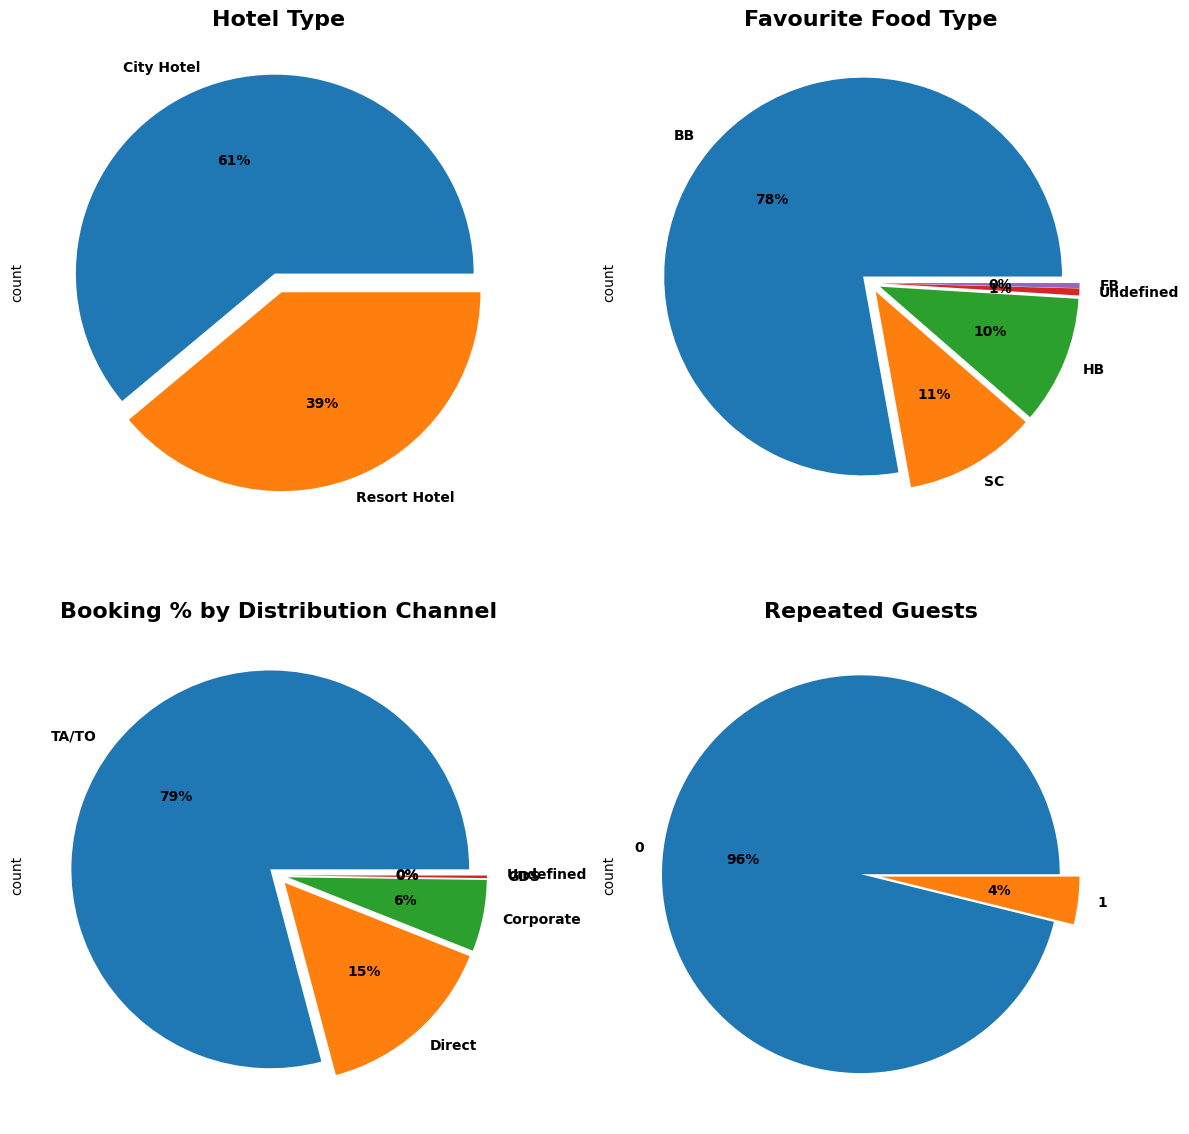

In [53]:
# Data for pie charts
pie_data = {
    "Hotel Type": Hotel_booking_df['hotel'].value_counts(),
    "Favourite Food Type": Hotel_booking_df['meal'].value_counts(),
    "Booking % by Distribution Channel": Hotel_booking_df['distribution_channel'].value_counts(),
    "Repeated Guests": Hotel_booking_df['is_repeated_guest'].value_counts()
}
# Explode settings
explode_settings = {
    "Hotel Type": [0.05, 0.05],
    "Favourite Food Type": [0.05]*5,
    "Booking % by Distribution Channel": [0.05]*len(Hotel_booking_df['distribution_channel'].value_counts()),
    "Repeated Guests": [0.05, 0.05]
}
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, data) in zip(axes.flatten(), pie_data.items()):
    data.plot.pie(
        autopct='%1.0f%%',
        textprops={'weight': 'bold'},
        explode=explode_settings[title],
        ax=ax
    )
    ax.set_title(title, fontweight="bold", size=16)

plt.tight_layout()
plt.show()



<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
1-->As we can see 61% are city hotels and 39% are resort hotels

2-->BB --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

3-->Most 79% people prefer'TA/TO' for booking

4-->only 4% people are repeated guests. The guest retention rate is very low.
</h6>

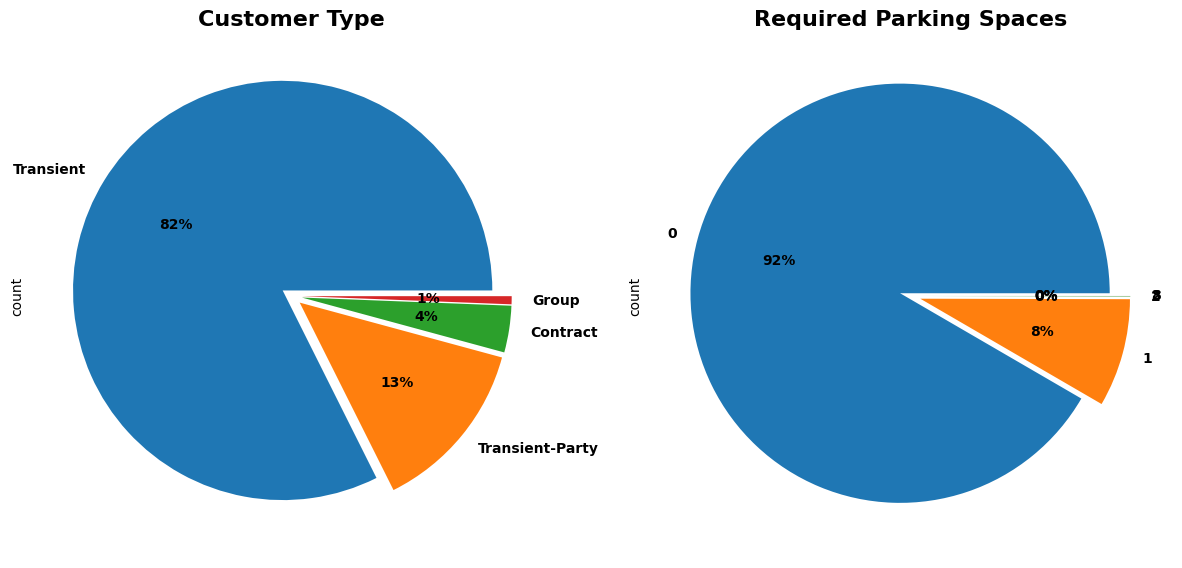

In [54]:
# Data for pie charts
pie_data = {
    "Customer Type": Hotel_booking_df['customer_type'].value_counts(),
    "Required Parking Spaces": Hotel_booking_df['required_car_parking_spaces'].value_counts()
}
# Explode settings
explode_settings = {
    "Customer Type": [0.05] * pie_data["Customer Type"].nunique(),
    "Required Parking Spaces": [0.05] * pie_data["Required Parking Spaces"].nunique()
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, data) in zip(axes.flatten(), pie_data.items()):
    data.plot.pie(
        autopct='%1.0f%%',
        textprops={'weight': 'bold'},
        explode=explode_settings[title],
        ax=ax
    )
    ax.set_title(title, fontweight="bold", size=16)

plt.tight_layout()
plt.show()



<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces
</h6>

Hotel Wise Bookings based on Date Month and year

In [55]:
Hotel_booking_df['arrival_date_month'].value_counts()

arrival_date_month
8     11239
7     10039
5      8342
4      7898
6      7755
3      7487
10     6921
9      6680
2      6080
12     5110
11     4970
1      4683
Name: count, dtype: int64

In [56]:
# Filter only Resort Hotel bookings
Resort_df = Hotel_booking_df[Hotel_booking_df['hotel'] == 'Resort Hotel']

# Count bookings by month
Resort_df['arrival_date_month'].value_counts()

arrival_date_month
8     4664
7     4312
5     2942
4     2828
6     2759
10    2724
3     2656
2     2490
9     2450
12    2112
11    2048
1     1959
Name: count, dtype: int64

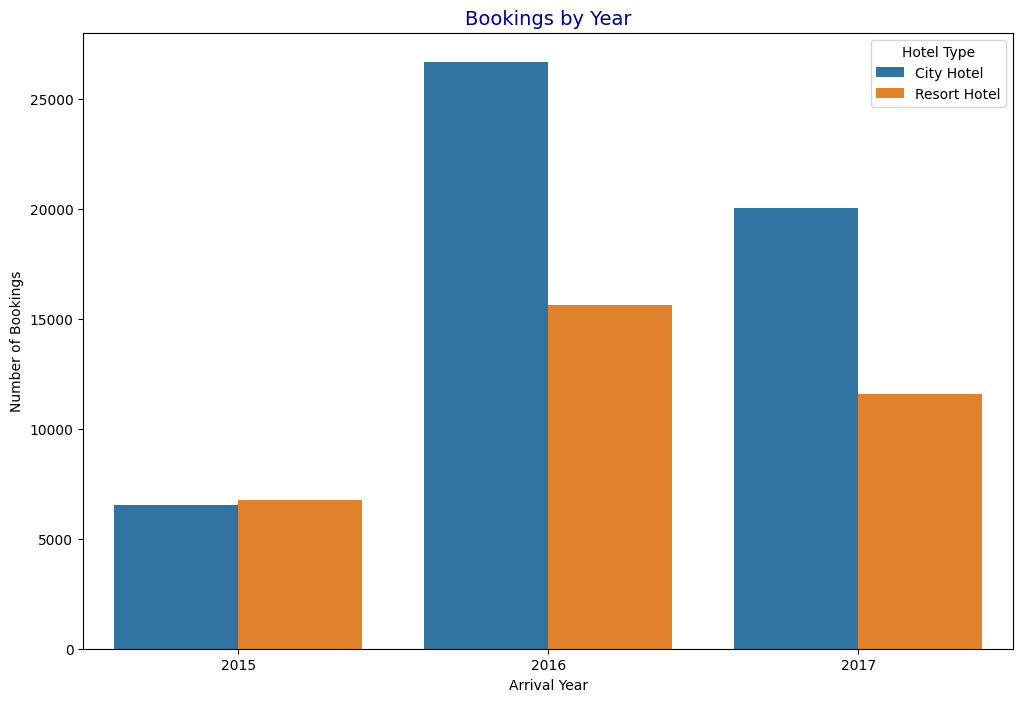

In [57]:

# Plot bookings by year and hotel type
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_year', data=Hotel_booking_df, hue='hotel')
plt.title('Bookings by Year', fontsize=14, color="darkblue")
plt.xlabel("Arrival Year")
plt.ylabel("Number of Bookings")
plt.legend(title="Hotel Type")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
1-->Bookings for city hotels are higher than resort hotels over the years and in year 2016 the bookings for both the hotels were maximum.

2-->Most bookings were done in the month of May,June, July, August.
</h6>


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
As we have seen above the busiest months for both the hotels are May,june ,july,August.
</h6>

<h3 style="color:darkblue"; >
From Where the most guests are coming ????
</h3>

Text(0.5, 1.0, 'Number of bookings country wise')

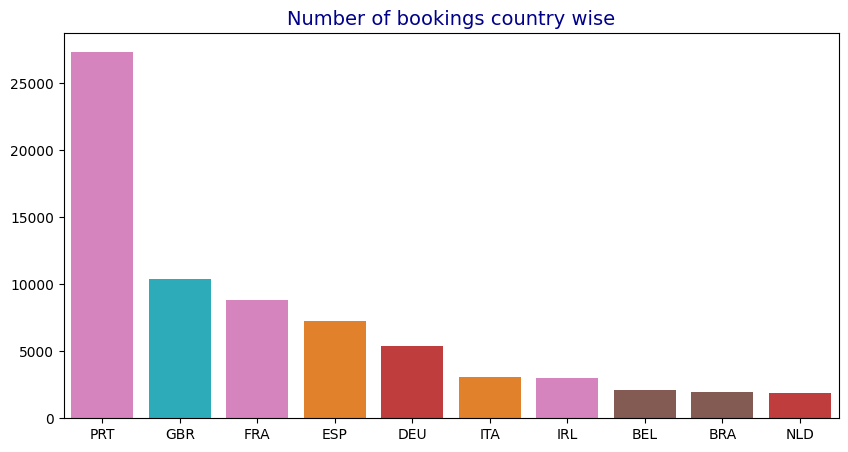

In [58]:
plt.figure(figsize = (10,5)) 
top_countries = Hotel_booking_df['country'].value_counts().head(10)
sns.barplot (y= list(Hotel_booking_df.country.value_counts().head (10)), x= list(Hotel_booking_df.country.value_counts().head(10).index),hue=top_countries.index,palette="tab10")
plt.title("Number of bookings country wise",fontsize=14, color="darkblue")

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Most guest are from Portugal and other Europian contries.
</h6>

<h3 style="color:darkblue"; >
Adults and kids
</h3>

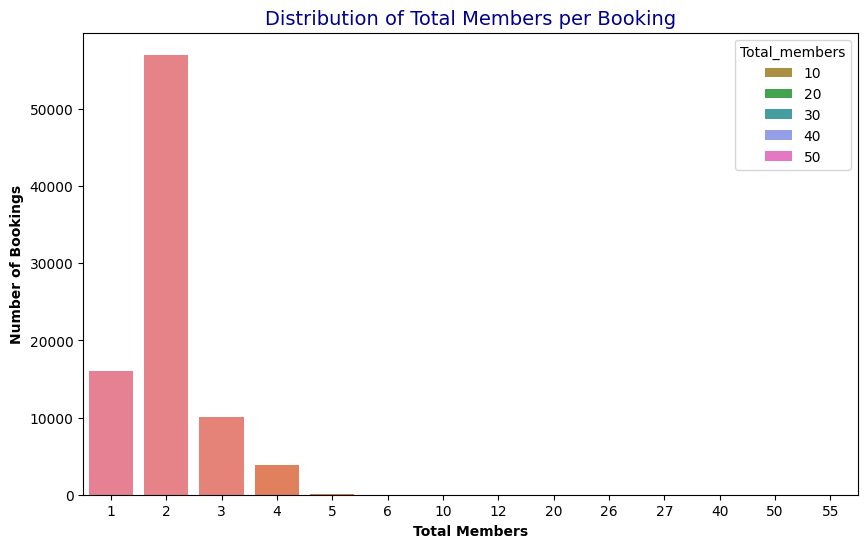

In [59]:

plt.figure(figsize=(10,6))
sns.countplot(
    x='Total_members', 
    data=Hotel_booking_df, 
    hue='Total_members',       # ✅ Assign x also to hue
    palette='husl'
)
plt.title("Distribution of Total Members per Booking",fontsize=14, color="darkblue")
plt.xlabel("Total Members", fontweight="bold")
plt.ylabel("Number of Bookings", fontweight="bold")
plt.show()




<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Most guests prefer to come as pair of 2 Adults.
</h6>

<h3 style="color:darkblue"; >
Most preferred Room type
</h3>

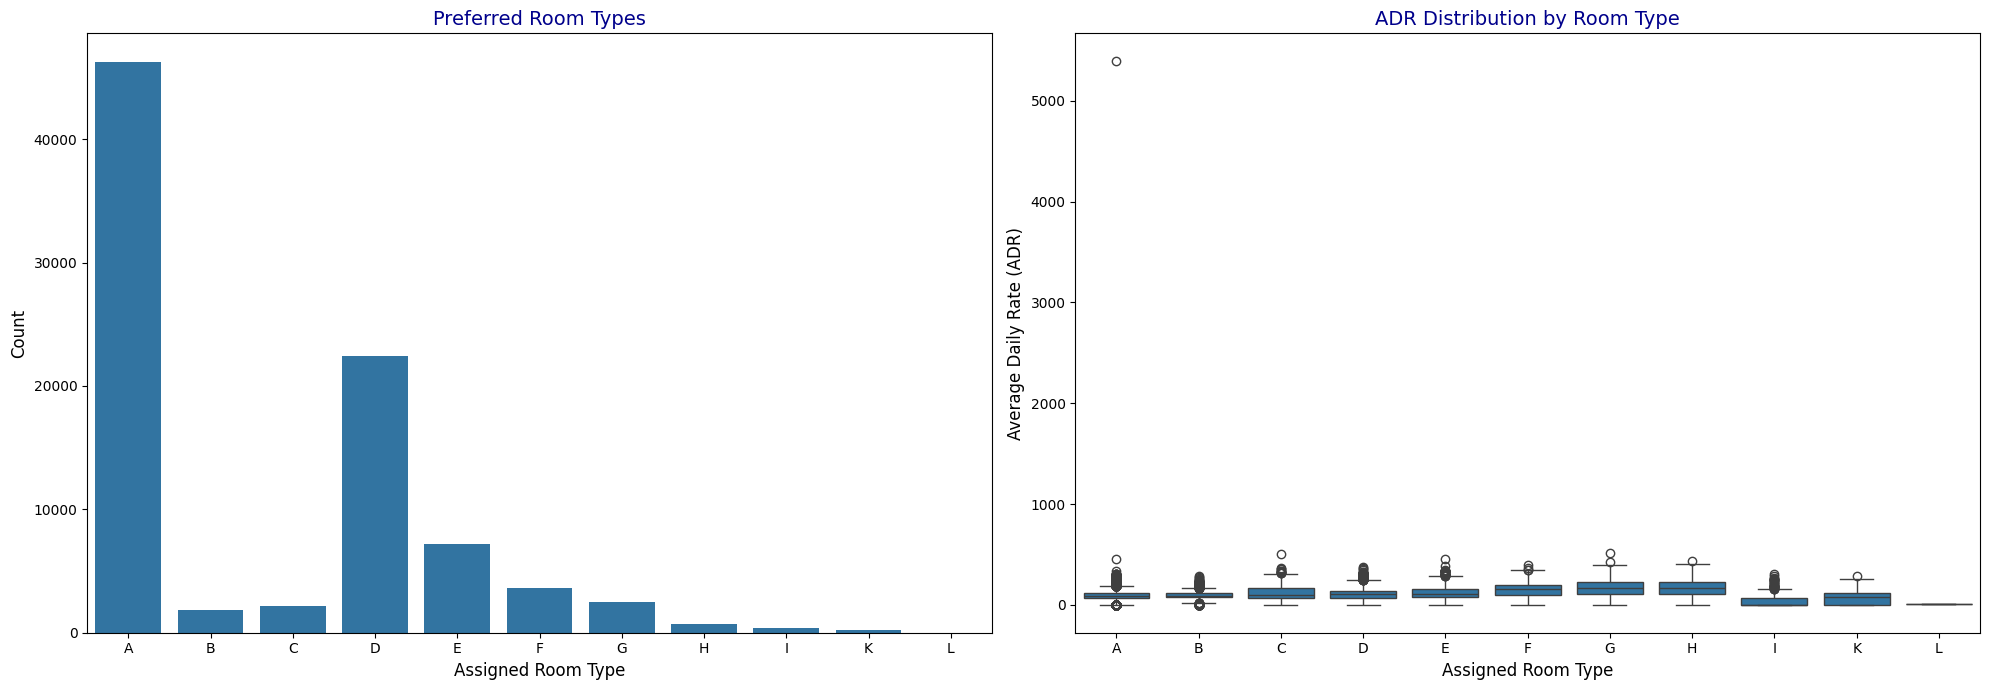

In [60]:
plt.figure(figsize=(20,7))

# Plot 1: Countplot of room types
plt.subplot(1,2,1)
sns.countplot(x="assigned_room_type", data=Hotel_booking_df)
plt.title("Preferred Room Types", fontsize=14, color="darkblue")
plt.xlabel("Assigned Room Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Plot 2: Boxplot of ADR by room type
plt.subplot(1,2,2)
sns.boxplot(x="assigned_room_type", y="adr", data=Hotel_booking_df)
plt.title("ADR Distribution by Room Type",fontsize=14, color="darkblue")
plt.xlabel("Assigned Room Type", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)

plt.tight_layout()
plt.show()




<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.
</h6>

<h3 style="color:darkblue"; >
Stay length in hotels 
</h3>

Text(0.5, 1.0, 'Stay length in hotels')

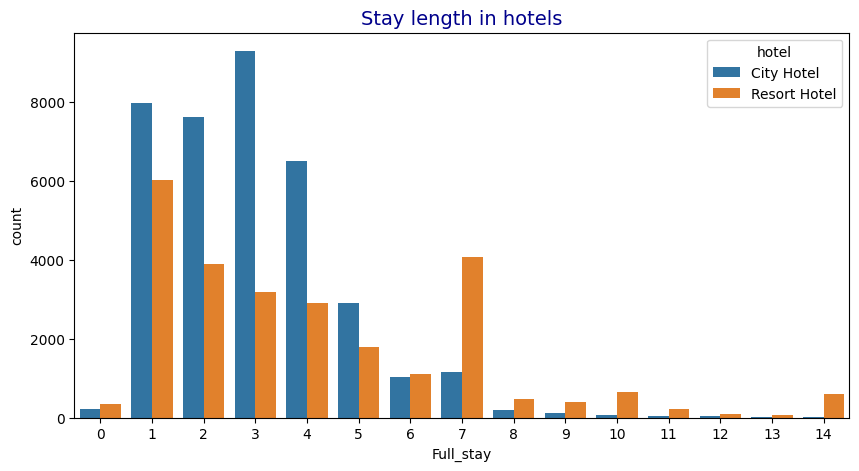

In [61]:
not_canceled = Hotel_booking_df[Hotel_booking_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontsize=14, color="darkblue")

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.
</h6>

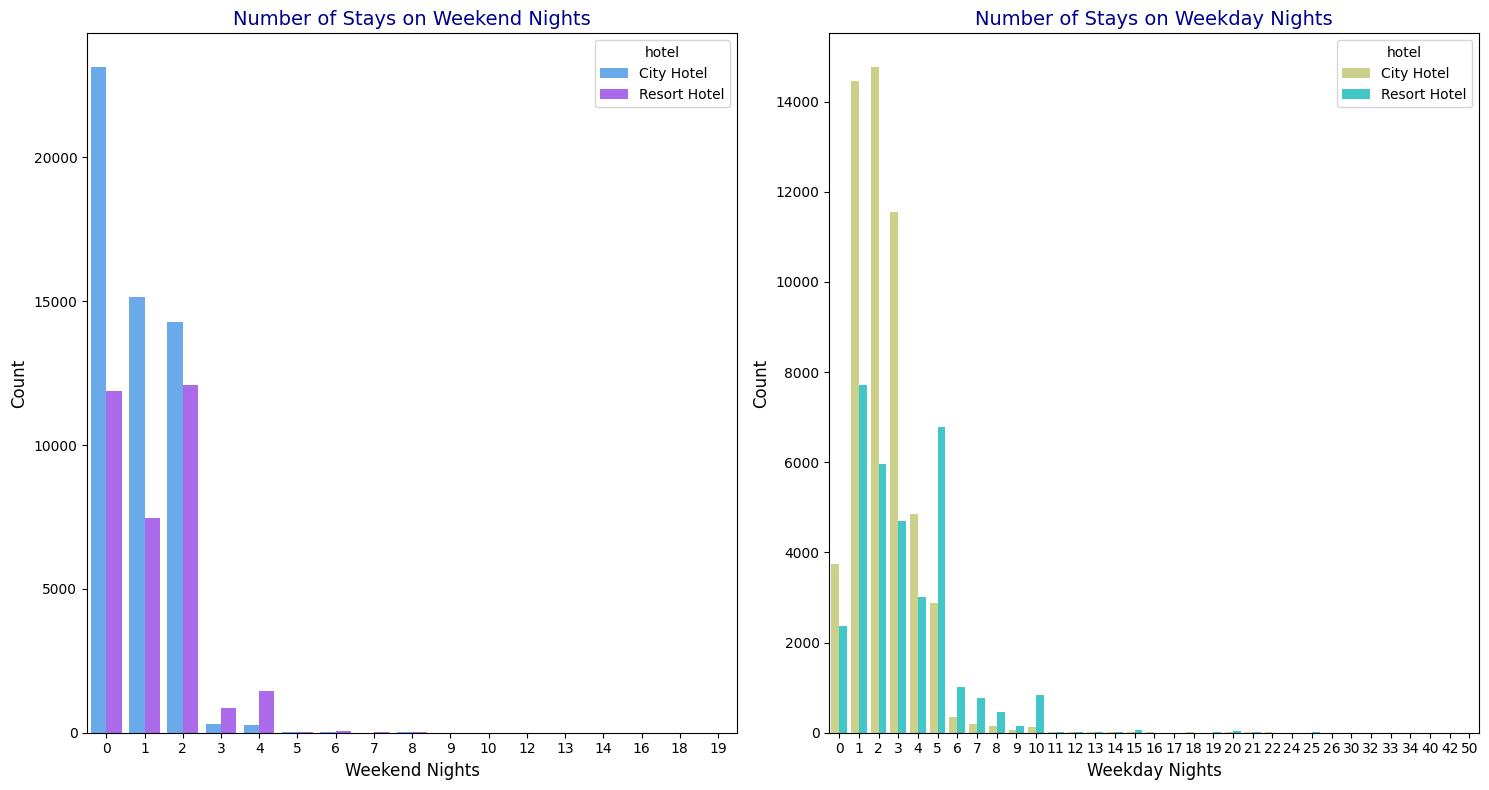

In [62]:
plt.figure(figsize=(15, 8))

# Weekend nights
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=Hotel_booking_df, palette='cool')
plt.title("Number of Stays on Weekend Nights", fontsize=14, color="darkblue")
plt.xlabel("Weekend Nights", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Weekday nights
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights', hue='hotel', data=Hotel_booking_df, palette='rainbow_r')
plt.title("Number of Stays on Weekday Nights", fontsize=14, color="darkblue")
plt.xlabel("Weekday Nights", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
City hotels have more number of stays irrespective of week or weekend stays.
</h6>

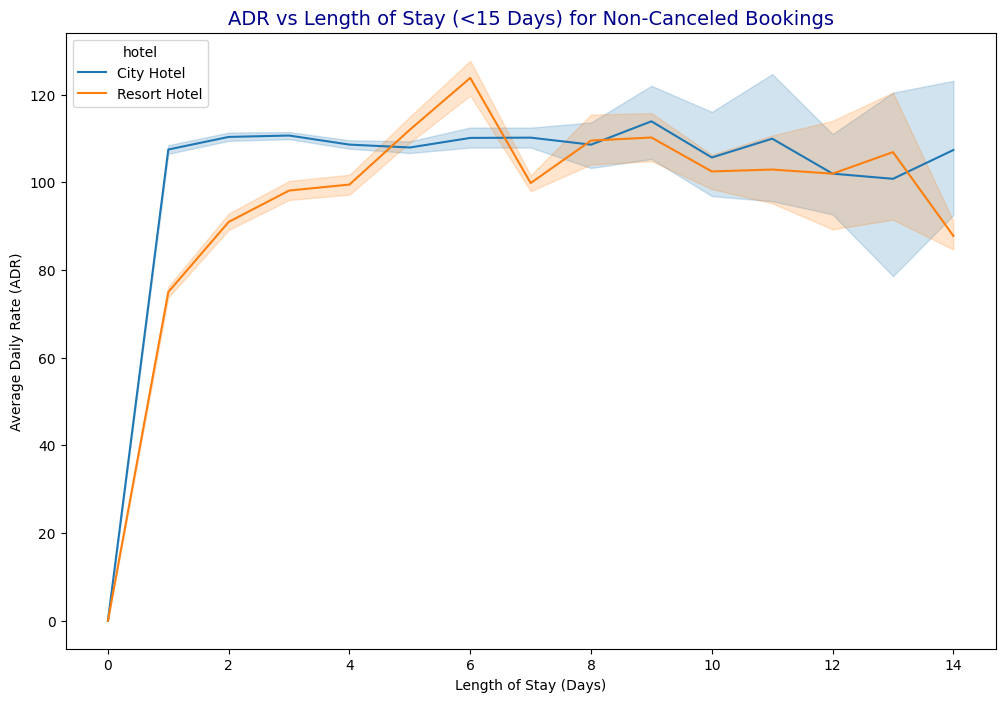

In [63]:
not_canceled = Hotel_booking_df[Hotel_booking_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        # taking less than 15 days of Full stay

plt.figure(figsize =(12,8))
sns.lineplot(data=s1, x='Full_stay', y='adr', hue='hotel')

plt.title("ADR vs Length of Stay (<15 Days) for Non-Canceled Bookings", fontsize=14, color="darkblue")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
After 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days. For city hotels is almost constant. And Average_daily_rate goes down after 14 days(long stay).
</h6>

<h3 style="color:darkblue"; >
Cancellation rates
</h3>

Text(0.5, 1.0, 'Booking preferred with deposite type')

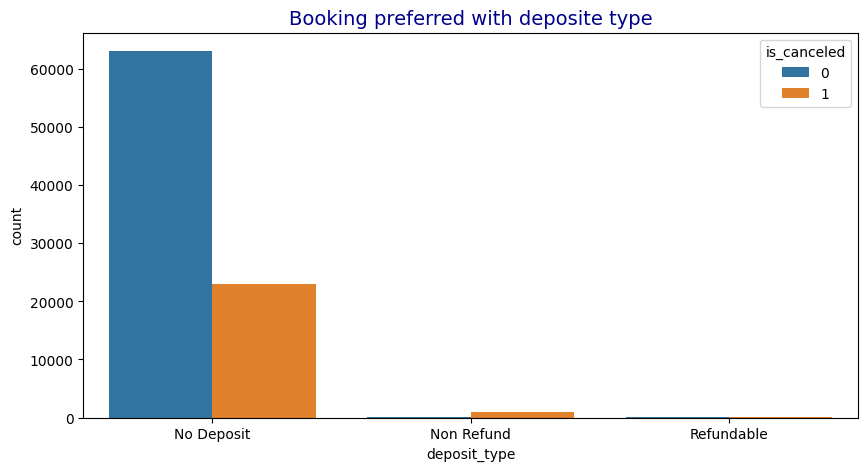

In [64]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_booking_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontsize=14, color="darkblue")


<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings
</h6>

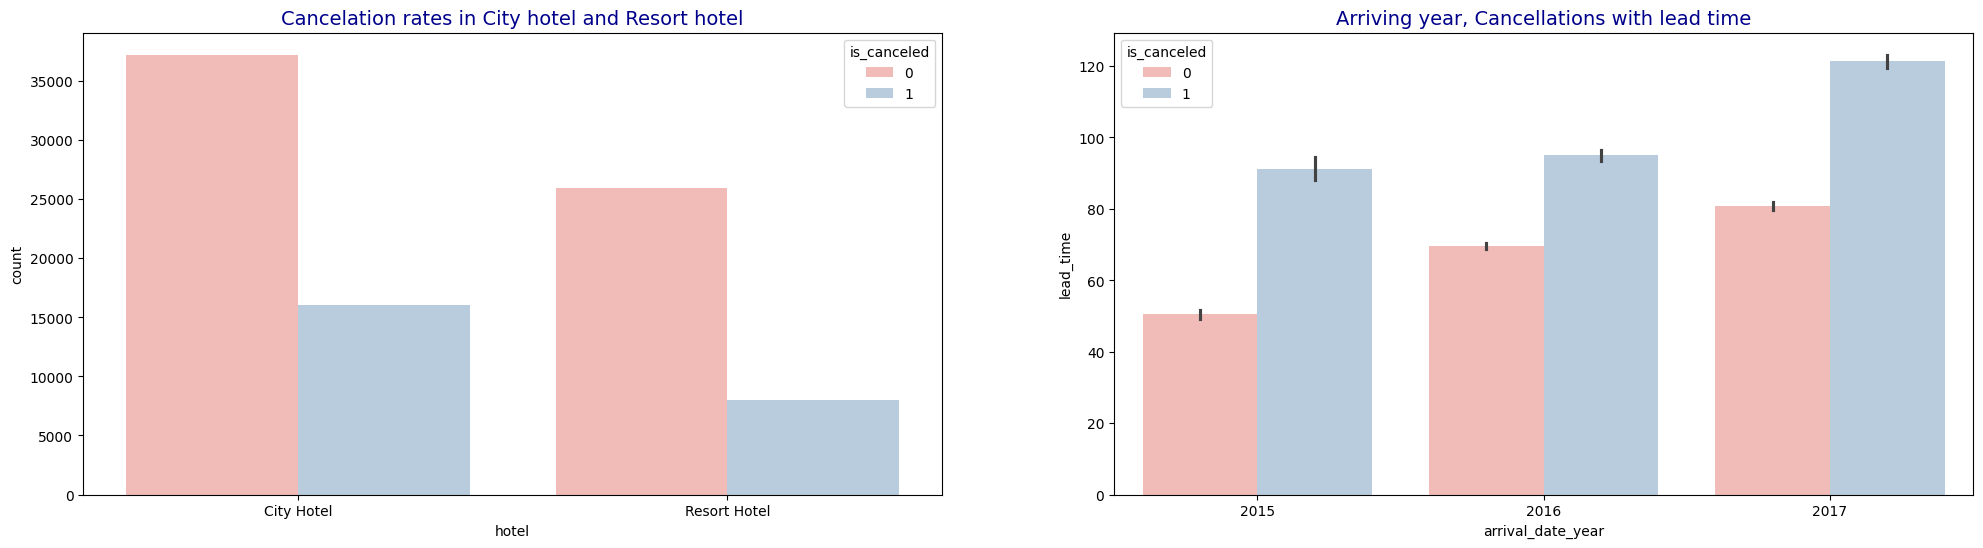

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_booking_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontsize=14, color="darkblue")
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_booking_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontsize=14, color="darkblue")
plt.subplots_adjust(right=1.7)

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;>
Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation.
City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation. City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>

<h3 style="color:darkblue"; >
Waiting time
</h3>

          hotel  avg_waiting_period
0    City Hotel            1.020334
1  Resort Hotel            0.316875


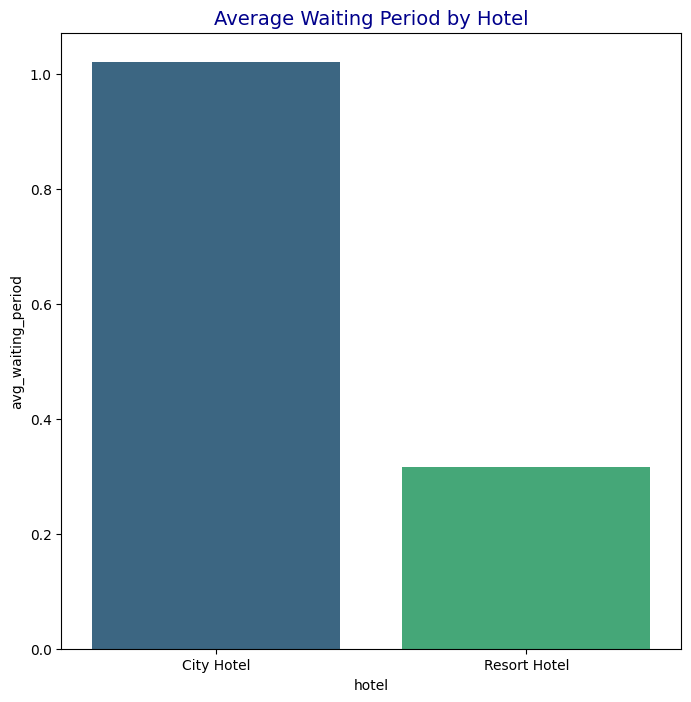

In [66]:
# Group by 'hotel' and calculate mean waiting days
Waiting_df = (
    Hotel_booking_df.groupby('hotel', observed=True)['days_in_waiting_list']
    .mean()
    .reset_index()
    .rename(columns={'days_in_waiting_list': 'avg_waiting_period'})
)
print(Waiting_df)

# Plot

plt.figure(figsize=(8, 8))
sns.barplot(
    x="hotel",
    y="avg_waiting_period",
    data=Waiting_df,
    hue="hotel",            
    dodge=False,            # bars won’t overlap
    palette="viridis",
    legend=False            # hide duplicate legend
)
plt.title("Average Waiting Period by Hotel", fontsize=14, color="darkblue")
plt.show()



<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;>
City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>



<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>

<h3 style="color:darkblue"; >
Average_daily_rate and price
</h3>

Text(0.5, 1.0, 'Average daily rate month wise')

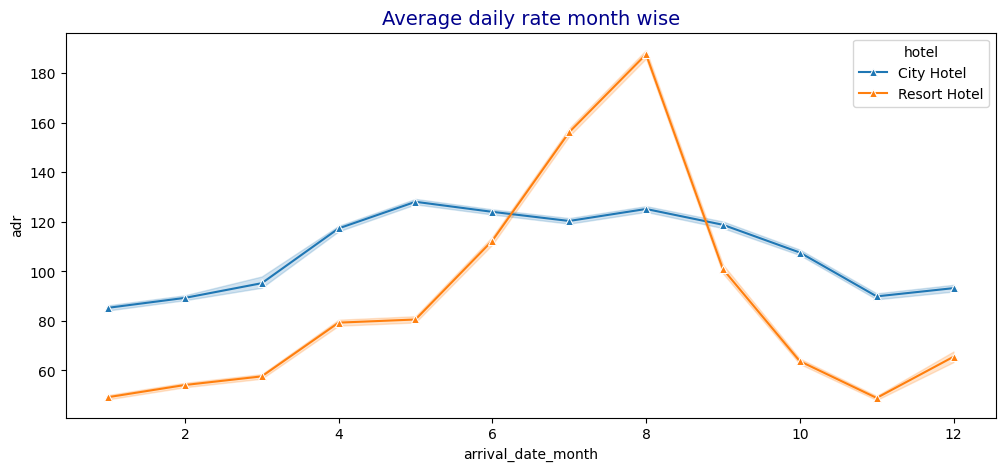

In [67]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_booking_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontsize=14, color="darkblue")

<h6 style="color:darkblue; font-family:Arial; font-size:14px; line-height:1.5;">
For Resort Hotels, the average daily rate is higher during August, July, and September.<br>
For City Hotels, the average daily rate is higher during August, July, June, and May.
</h6>


<h3 style="color:darkblue"; >
Special Requests
</h3>

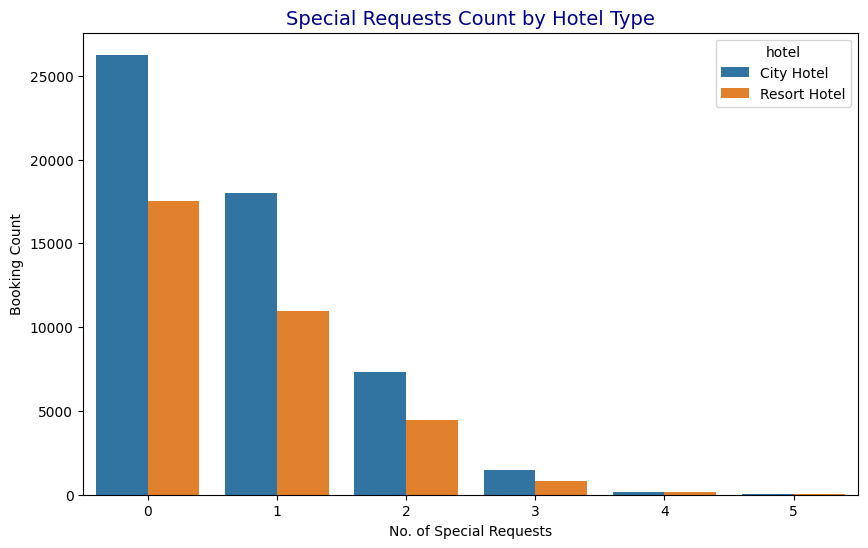

In [68]:
plt.figure(figsize =(10,6))
sns.countplot(data=Hotel_booking_df, x='total_of_special_requests', hue='hotel')
plt.xlabel('No. of Special Requests')
plt.ylabel('Booking Count')
plt.title("Special Requests Count by Hotel Type", fontsize=14, color="darkblue")
plt.show()


<h6 style="color:darkblue; font-family:Arial; font-size:14px;">
City Hotels have more special requests. Most guests ask for only 1 special request.
</h6>


<h2 style="color:darkblue; background-color:#eef4ff; padding:12px; border-radius:8px; text-align:center; font-family:Trebuchet MS; border:2px solid #c0d6f0;">
Conclusion & Key Insights from Hotel Booking Dataset
</h2>

<p style="font-size:15px; color:#333; font-family:Calibri; line-height:1.6;">
The analysis of the hotel booking dataset provides valuable insights into guest behavior, booking trends, and areas for improvement.
</p>

<ul style="font-size:14px; font-family:Calibri; line-height:1.8; list-style-type:none; padding:0;">
  <li style="background-color:#dceefc; margin:6px 0; padding:8px; border-left:6px solid #3399ff; border-radius:5px;">
    <b style="color:#00509e;">Guest Origins:</b> Most guests come from <b>Western Europe</b>, suggesting marketing efforts should focus on this region to maximize reach.
  </li>
  <li style="background-color:#fff0d9; margin:6px 0; padding:8px; border-left:6px solid #ff9900; border-radius:5px;">
    <b style="color:#b35900;">Hotel Preference:</b> Approximately <b>61% of bookings</b> are for <b>City Hotels</b> and <b>39% for Resort Hotels</b>, indicating that City Hotels are busier.
  </li>
  <li style="background-color:#e6f9e6; margin:6px 0; padding:8px; border-left:6px solid #33cc33; border-radius:5px;">
    <b style="color:#006600;">Seasonal Trends:</b> Peak months are <b>May to August</b>, aligning with the summer season. Strategic planning is needed for staffing and promotions.
  </li>
  <li style="background-color:#fce6f0; margin:6px 0; padding:8px; border-left:6px solid #ff3399; border-radius:5px;">
    <b style="color:#99004d;">Customer Retention:</b> Few repeat guests exist. Implementing <b>loyalty programs</b> could help increase returning customers.
  </li>
  <li style="background-color:#fff5e6; margin:6px 0; padding:8px; border-left:6px solid #ff6600; border-radius:5px;">
    <b style="color:#b34700;">Booking Channels:</b> Around <b>80% of bookings</b> come through <b>Travel Agents/Operators (TA/TO)</b>, highlighting the importance of these channels.
  </li>
  <li style="background-color:#e6f7ff; margin:6px 0; padding:8px; border-left:6px solid #3399ff; border-radius:5px;">
    <b style="color:#00509e;">Stay Duration:</b> Most guests stay for <b>less than 4 days</b>. Short stays favor City Hotels, while longer stays favor Resort Hotels.
  </li>
  <li style="background-color:#f0f9e6; margin:6px 0; padding:8px; border-left:6px solid #66cc33; border-radius:5px;">
    <b style="color:#339900;">Low-Season Opportunity:</b> <b>November to February</b> sees fewer bookings and lower ADR, making it ideal for <b>discounts and promotions</b>.
  </li>
  <li style="background-color:#ffe6e6; margin:6px 0; padding:8px; border-left:6px solid #ff3333; border-radius:5px;">
    <b style="color:#cc0000;">High-Season Caution:</b> <b>May to August</b> are the busiest months with high demand and rates. Off-peak travel is preferable for guests avoiding crowds.
  </li>
</ul>


<h2 style="color:darkgreen; background-color:#e6f9e6; padding:12px; border-radius:8px; text-align:center; font-family:Trebuchet MS; border:2px solid #b3e6b3;">
Recommendations from Hotel Booking Analysis
</h2>

<ul style="font-size:14px; font-family:Calibri; line-height:1.8; list-style-type:none; padding:0;">
  <li style="background-color:#e6f9e6; margin:6px 0; padding:8px; border-left:6px solid #33cc33; border-radius:5px;">
    <b style="color:#006600;">Targeted Marketing:</b> Focus marketing campaigns on <b>Western European countries</b> to attract more guests from the majority source region.
  </li>
  <li style="background-color:#fff5e6; margin:6px 0; padding:8px; border-left:6px solid #ff9900; border-radius:5px;">
    <b style="color:#b35900;">Optimize City Hotel Resources:</b> Since <b>City Hotels receive more bookings (61%)</b>, ensure adequate staffing, room availability, and services to meet demand.
  </li>
  <li style="background-color:#e6f0ff; margin:6px 0; padding:8px; border-left:6px solid #3399ff; border-radius:5px;">
    <b style="color:#00509e;">Seasonal Planning:</b> Prepare for <b>peak months (May–August)</b> with increased staff, promotions, and revenue management strategies.
  </li>
  <li style="background-color:#fce6f0; margin:6px 0; padding:8px; border-left:6px solid #ff3399; border-radius:5px;">
    <b style="color:#99004d;">Loyalty Programs:</b> Implement <b>reward or loyalty schemes</b> to encourage repeat bookings and improve customer retention.
  </li>
  <li style="background-color:#fff0d9; margin:6px 0; padding:8px; border-left:6px solid #ff6600; border-radius:5px;">
    <b style="color:#b34700;">Booking Channel Partnerships:</b> Strengthen collaborations with <b>Travel Agents and Tour Operators (TA/TO)</b>, as they account for 80% of bookings.
  </li>
  <li style="background-color:#e6f7ff; margin:6px 0; padding:8px; border-left:6px solid #3399ff; border-radius:5px;">
    <b style="color:#00509e;">Stay Duration Packages:</b> Offer <b>short-stay packages</b> for City Hotels and <b>long-stay packages</b> or bundled services for Resort Hotels to maximize occupancy and revenue.
  </li>
  <li style="background-color:#f0f9e6; margin:6px 0; padding:8px; border-left:6px solid #66cc33; border-radius:5px;">
    <b style="color:#339900;">Low-Season Promotions:</b> Introduce <b>discounts, special offers, or events</b> during <b>November–February</b> to attract more bookings and boost ADR in low-demand periods.
  </li>
  <li style="background-color:#ffe6e6; margin:6px 0; padding:8px; border-left:6px solid #ff3333; border-radius:5px;">
    <b style="color:#cc0000;">Revenue Management in High Season:</b> Monitor <b>May–August</b> closely to optimize pricing and availability; consider <b>dynamic pricing strategies</b> to maximize revenue while avoiding overbooking.
  </li>
</ul>
